# Introduction

This worksheet covers linear regression. Similar to the previous worksheet, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

# Preliminaries
Import key packages: NumPy, matplotlib, and any others that you prefer to work with. In general, when writing code, you will put all your import statements at the top. However, for these worksheets we will import as we go along.

In [5]:
#TODO: import NumPy and matplotlib here

import numpy as np
import matplotlib.pyplot as plt

## Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [6]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [8]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# Split the dataset into training and test, using test_size=0.2

X = diabetes.data
y = diabetes.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(353, 10)

In [10]:
# Add a column of ones to Xtrain and Xtest for the intercept term
X_train = np.column_stack((X_train,np.ones(X_train.shape[0])))
X_train

X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))
X_test

array([[ 4.53409833e-02, -4.46416365e-02, -6.20595414e-03,
        -1.59989752e-02,  1.25018703e-01,  1.25198101e-01,
         1.91869970e-02,  3.43088589e-02,  3.24323242e-02,
        -5.21980442e-03,  1.00000000e+00],
       [ 9.25639832e-02, -4.46416365e-02,  3.69065288e-02,
         2.18723855e-02, -2.49601584e-02, -1.66581521e-02,
         7.78807997e-04, -3.94933829e-02, -2.25165284e-02,
        -2.17882321e-02,  1.00000000e+00],
       [ 6.35036756e-02,  5.06801187e-02, -4.05032999e-03,
        -1.25561242e-02,  1.03003457e-01,  4.87898765e-02,
         5.60033751e-02, -2.59226200e-03,  8.44915307e-02,
        -1.76461252e-02,  1.00000000e+00],
       [ 9.61965216e-02, -4.46416365e-02,  5.19958979e-02,
         7.92647113e-02,  5.48451074e-02,  3.65770865e-02,
        -7.65355859e-02,  1.41322109e-01,  9.86480615e-02,
         6.10539062e-02,  1.00000000e+00],
       [ 1.26481373e-02,  5.06801187e-02, -2.02175111e-02,
        -2.22757132e-03,  3.83336731e-02,  5.31739549e-02,
  

In [11]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv
theta = np.dot(np.linalg.pinv(X_train), y_train)

In [12]:
theta

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743,  151.34560454])

## Part (b) Computing performance metrics

In [13]:
# Make a prediction on the test set by applying the coefficients theta to the test set

y_pred = np.dot(X_test,theta)

y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [14]:
# Calculate the mean squared error and the R^2.
# You can use the built in functions from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}\nR^2: {r2}')

MSE: 2900.1936284934955
R^2: 0.4526027629719168


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [15]:
# Instantiate the linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [16]:
# Fit the model and make a prediction on the test set. Compare with your implementation

model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)

print(f'Manual predictions: {y_pred[:5]}')
print(f'Sklearn predictions: {y_pred_sk[:5]}')

Manual predictions: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]
Sklearn predictions: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

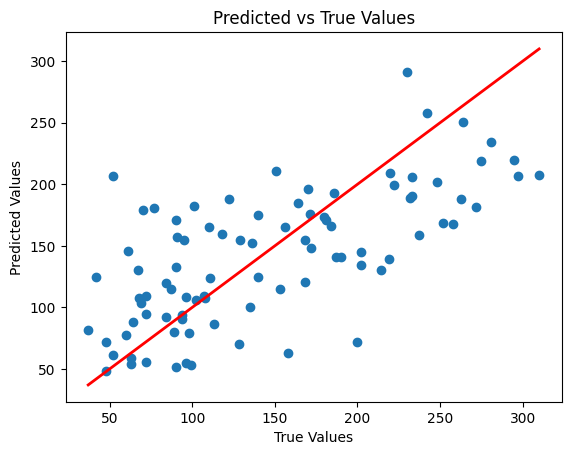

In [20]:
# Plot predicted values vs target values on a scatter plot, and drawing a line y=x

plt.scatter(y_test, y_pred)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.show()

# (Optional) Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?

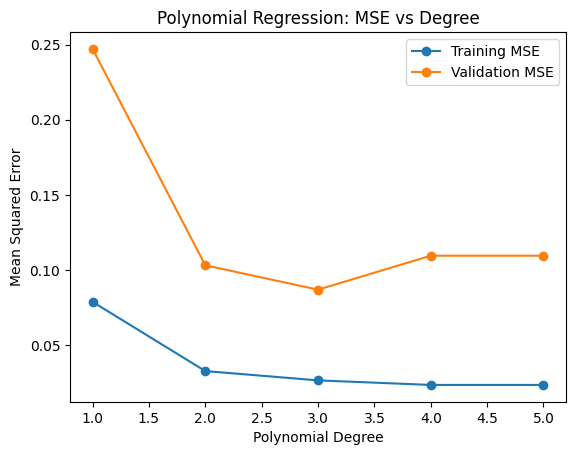

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Data
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Try polynomial degrees 1 through 5
degrees = [1, 2, 3, 4, 5]
train_mse = []
val_mse = []

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Compute MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_val, y_val_pred))

# Plot MSE vs degree
plt.plot(degrees, train_mse, marker='o', label='Training MSE')
plt.plot(degrees, val_mse, marker='o', label='Validation MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Regression: MSE vs Degree")
plt.legend()
plt.show()

1. **Training MSE (blue line)**:

   * Decreases continuously as the degree increases.
   * This is expected because higher-degree polynomials have more flexibility to fit the training data.
   * By degree 5, the training MSE is very low → model is almost perfectly fitting the training points.

2. **Validation MSE (orange line)**:

   * Drops sharply from degree 1 to 2 → moving from underfitting to a better fit.
   * Reaches **minimum at degree 3** → best balance between bias and variance.
   * Increases slightly for degrees 4 and 5 → overfitting: the model is fitting the training data too closely, which hurts generalization.

---

### ✅ Interpretation

* **Degree 1** → underfitting: too simple, cannot capture the pattern.
* **Degree 2–3** → good fit: captures the trend well without overfitting.
* **Degree >3** → overfitting: very low training error but validation error rises.

So, **the best polynomial degree for this dataset is 3**.
